In [1]:
import sys
sys.path.append('..')
import os
GCN_FILE_DIR = os.path.join(os.path.abspath('\\'.join(str(os.getcwd()).split('\\')[:-1])), 'GCN Files')

In [2]:
plt_config = {
    'figure.figsize': (10, 3),
    'figure.dpi': 144,
    'figure.facecolor': 'white',
    'axes.grid': True,
    'grid.linestyle': '--',
    'grid.linewidth': 0.5,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'axes.spines.left': False,
    'axes.spines.right': False,
}

In [3]:
from gEconpy.classes.model import gEconModel

import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

plt.rcParams.update(plt_config)

from src.utils import plot_dfs

load data

In [4]:
cov = pd.read_csv('covariance_matrix.csv')
cov = cov.set_index('Unnamed: 0')
cov.index.rename = 'variables'
cov = cov.loc[['y', 'pi_core', 'r', 'I', 'c', 'n', 'w'], ['y', 'pi_core', 'r', 'I', 'c', 'n', 'w']]

df = pd.read_csv('data_quarterly.csv')

load model

In [5]:
mod1 = gEconModel(os.path.join(GCN_FILE_DIR, 'NK_canonical.gcn'))
print('#' * 20, 'SOLVE MODEL', '#'*20)
mod1.steady_state()
mod1.solve_model()
mod1.check_bk_condition();

print('#' * 20, 'STEADY STATE', '#'*20)
mod1.print_steady_state()

Model Building Complete.
Found:
	16 equations
	16 variables
	The following "variables" were defined as constants and have been substituted away:
		B_t
	3 stochastic shocks
		 0 / 3 has a defined prior. 
	11 parameters
		 0 / 11 has a defined prior. 
	2 calibrating equations
	2 parameters to calibrate
 Model appears well defined and ready to proceed to solving.

#################### SOLVE MODEL ####################
Steady state found! Sum of squared residuals is 9.760551087350258e-22
Solution found, sum of squared residuals:  8.027537305022083e-29
Norm of deterministic part: 0.000000000
Norm of stochastic part:    0.000000000
Model solution has 6 eigenvalues greater than one in modulus and 4 forward-looking variables.
Blanchard-Kahn condition is satisfied.
#################### STEADY STATE ####################
A_ss                1.000
C_ss                0.839
Div_ss              0.498
LHS_ss              4.241
L_ss                0.763
RHS_ss              2.651
TC_ss              -0.3

In [6]:
mod2 = gEconModel(os.path.join(GCN_FILE_DIR, 'NK_canonical_linear.gcn'))
print('#' * 20, 'SOLVE MODEL', '#'*20)
mod2.steady_state(model_is_linear=True)
mod2.solve_model(model_is_linear=True)
mod2.check_bk_condition();

print('#' * 20, 'STEADY STATE', '#'*20)
mod2.print_steady_state()

Model Building Complete.
Found:
	4 equations
	4 variables
	1 stochastic shock
		 0 / 1 has a defined prior. 
	10 parameters
		 0 / 10 has a defined prior. 
	0 calibrating equations
	0 parameters to calibrate
 Model appears well defined and ready to proceed to solving.

#################### SOLVE MODEL ####################
Steady state found! Sum of squared residuals is 9.30927926823657e-33
Solution found, sum of squared residuals:  2.3487623518302604e-31
Norm of deterministic part: 0.000000000
Norm of stochastic part:    0.000000000
Model solution has 2 eigenvalues greater than one in modulus and 2 forward-looking variables.
Blanchard-Kahn condition is satisfied.
#################### STEADY STATE ####################
i_ss           0.010
pi_ss         -0.000
v_ss           0.000
y_ss          -0.000


covariance matrix

In [7]:
cov1 = mod1.compute_stationary_covariance_matrix()
cov1 = cov1.loc[['C', 'L', 'Y', 'pi', 'r', 'w'], ['C', 'L', 'Y', 'pi', 'r', 'w']]

cov2 = mod2.compute_stationary_covariance_matrix()

C:\Users\LukasGrahl\Documents\GIT\gEconpy\examples\..\gEconpy\classes\model.py:828: UserWarning: No standard deviation provided for shocks epsilon_A, epsilon_R, epsilon_pi. Using default of std = 0.01. Explicitypass variance information for these shocks or set their priors to silence this warning.
  warn(
C:\Users\LukasGrahl\Documents\GIT\gEconpy\examples\..\gEconpy\classes\model.py:828: UserWarning: No standard deviation provided for shocks epsilon_v. Using default of std = 0.01. Explicitypass variance information for these shocks or set their priors to silence this warning.
  warn(


C:\Users\LukasGrahl\AppData\Local\Temp\ipykernel_19804\1664209277.py:14: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  fig.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


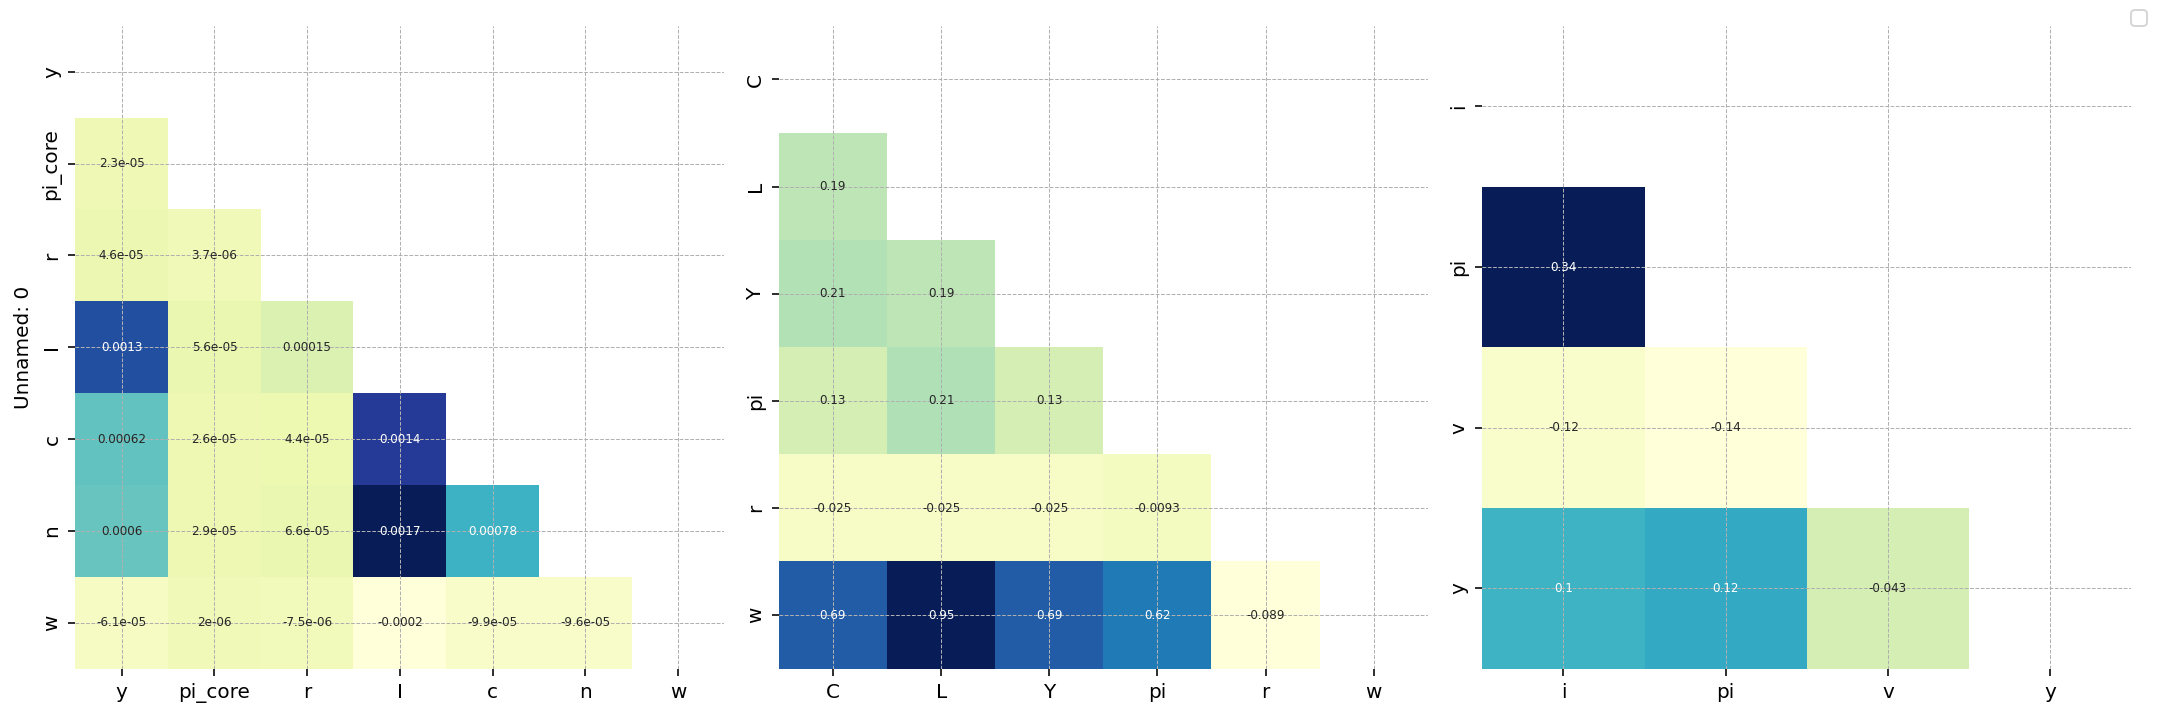

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
mask = np.zeros_like(cov)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(cov, cmap='YlGnBu', ax=ax[0], mask=mask, annot=True, annot_kws={'size':6}, cbar=False, label='real data')

mask = np.zeros_like(cov1)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(cov1, cmap='YlGnBu', ax=ax[1], mask=mask, annot=True, annot_kws={'size':6}, cbar=False, label='model 1')

mask = np.zeros_like(cov2)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(cov2, cmap='YlGnBu', ax=ax[2], mask=mask, annot=True, annot_kws={'size':6}, cbar=False, label='model 2')

fig.legend()
plt.tight_layout()

### IRF

In [9]:
from src.utils import plot_dfs

In [10]:
shock_size = -.1
sim_length = 120

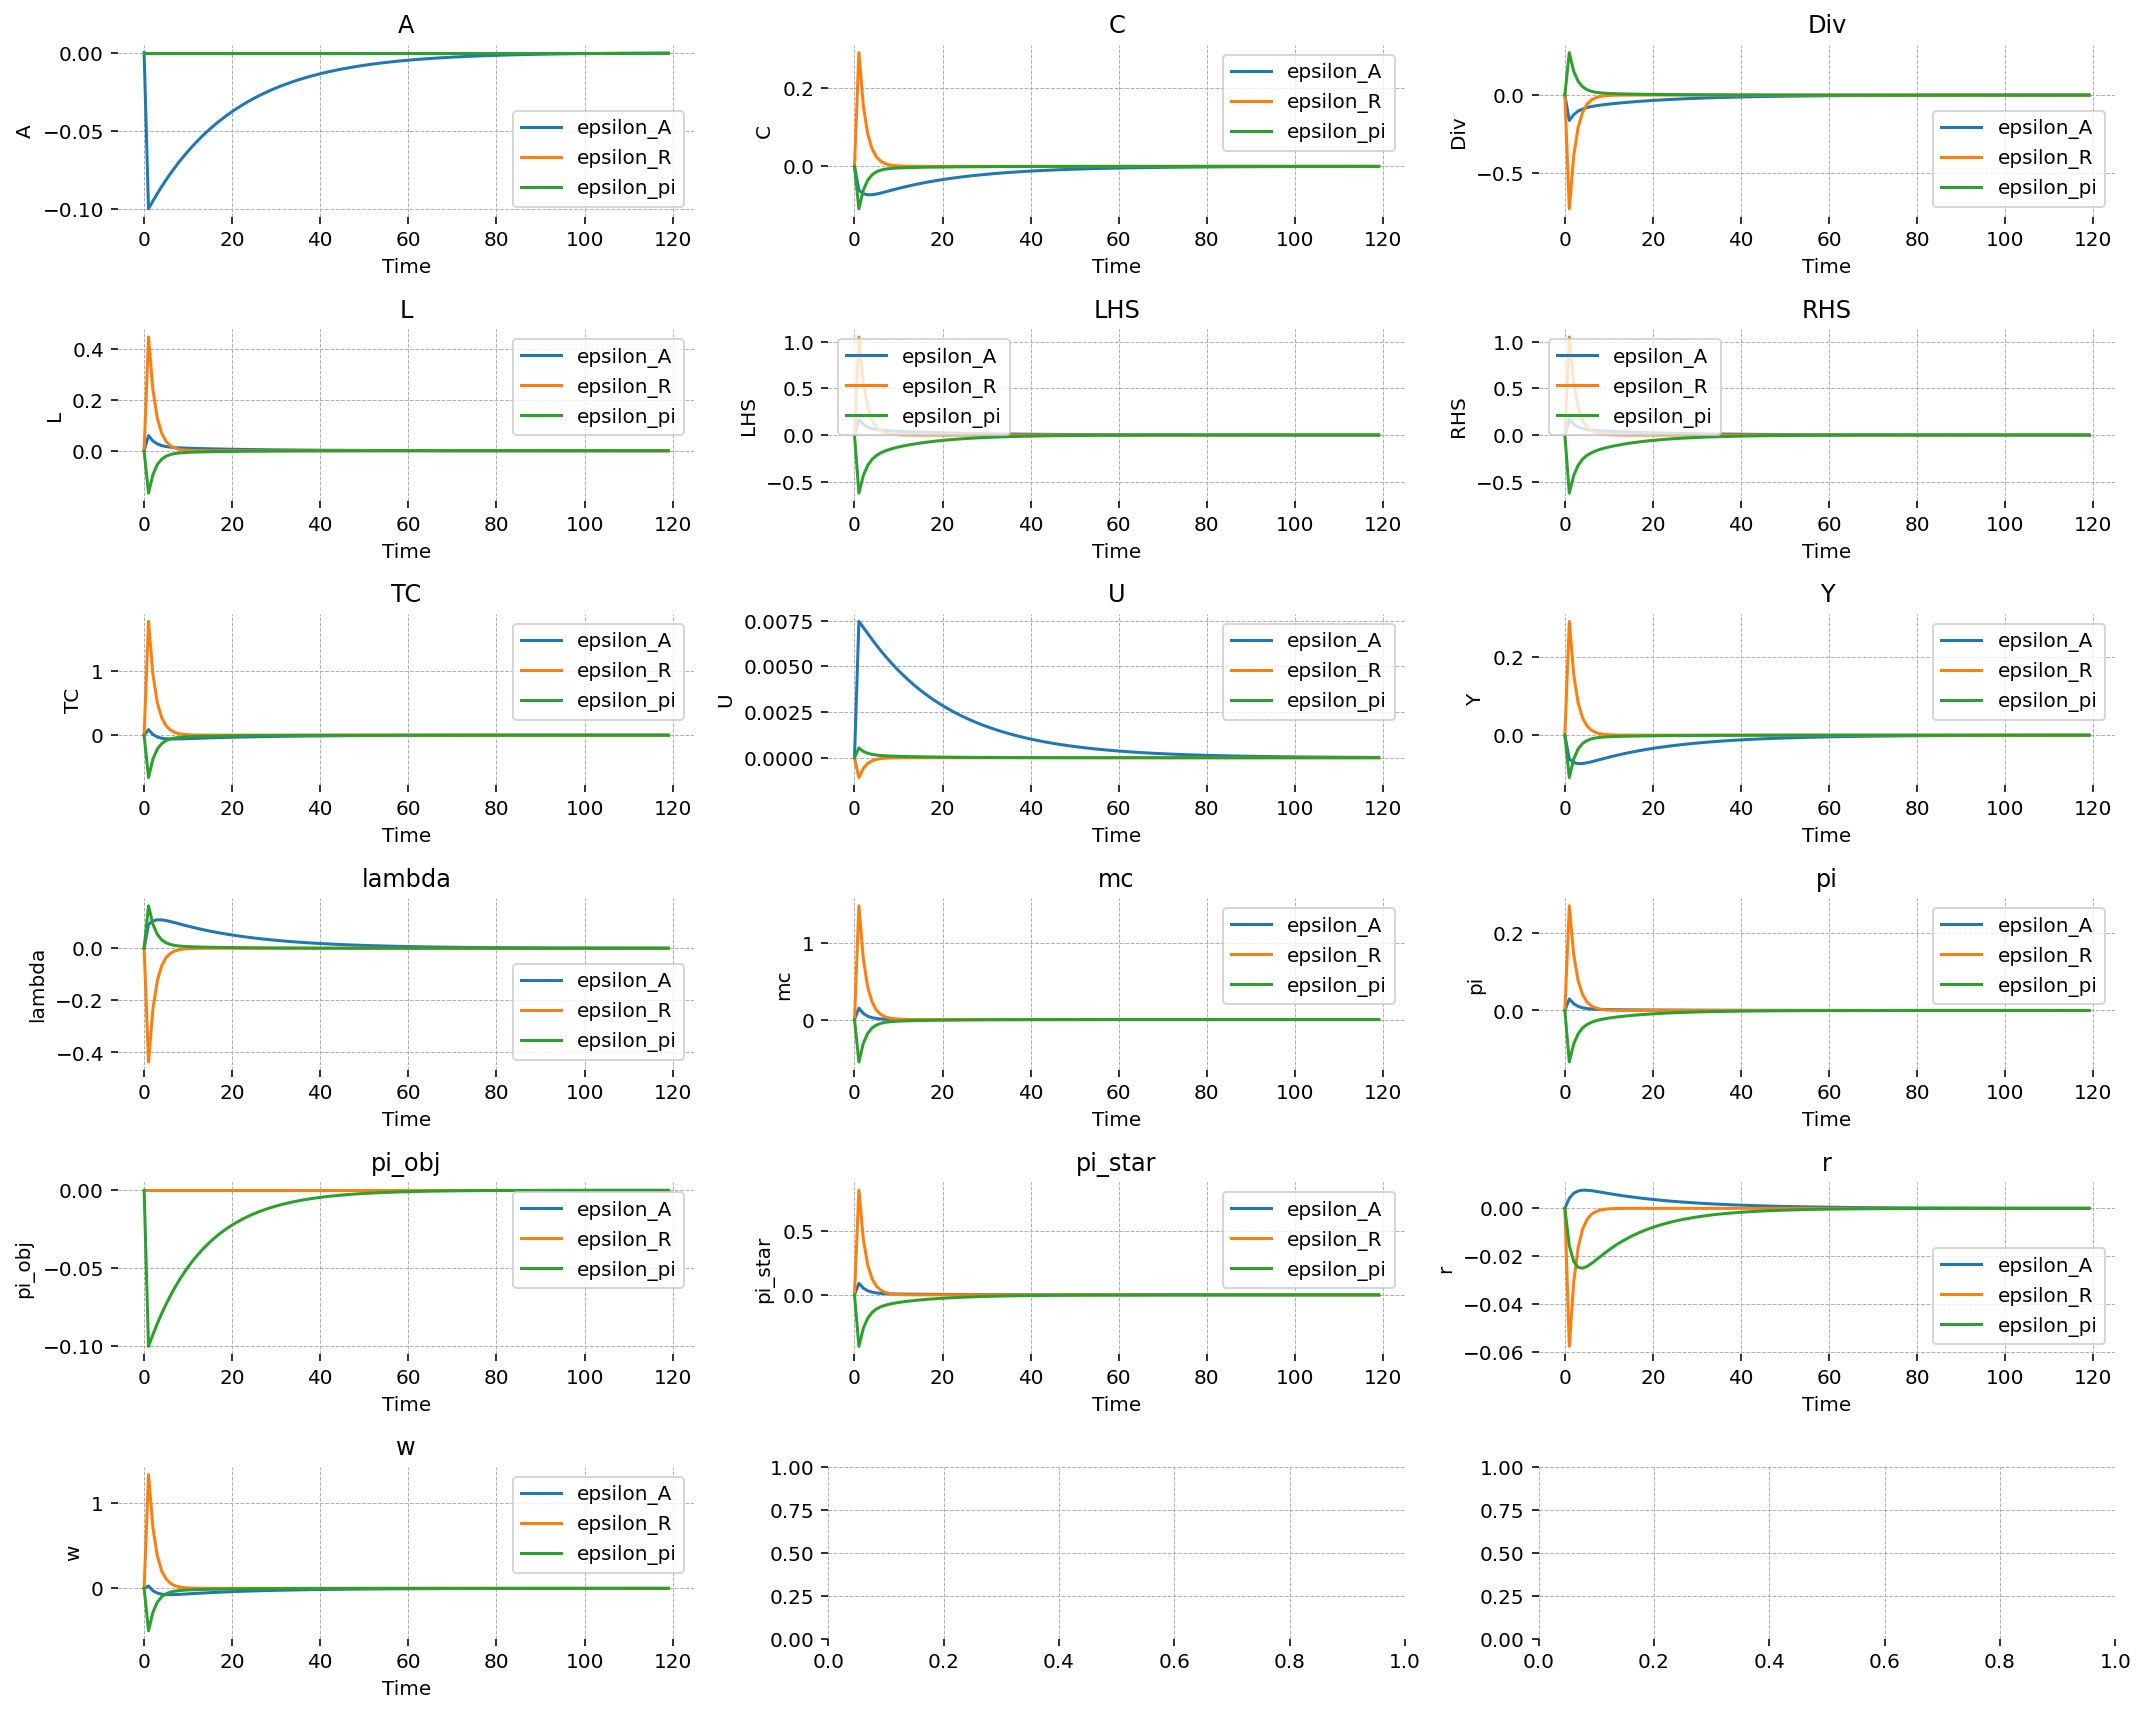

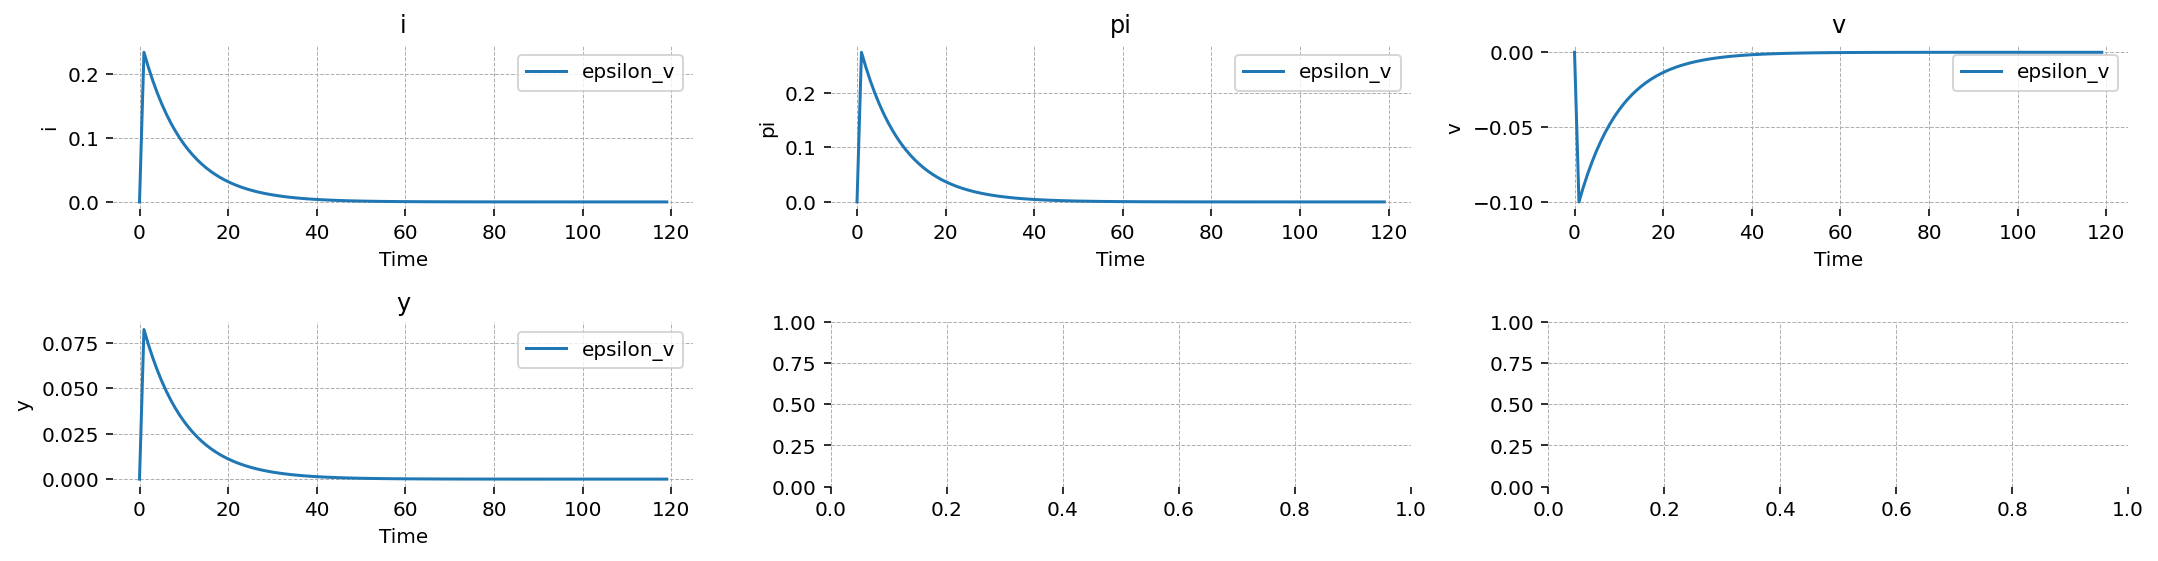

In [11]:
for mod in [mod1, mod2]:
    # get irfs
    _ = mod.impulse_response_function(simulation_length=sim_length, shock_size=shock_size)
    
    # plot irf per shock
    dfs = [_.unstack().loc[:, item].unstack() for item in [i.base_name for i in mod.shocks]]
    plot_dfs(dfs, sns.lineplot, legend=[i.base_name for i in mod.shocks]);